# 1.Importing Libraries

In [11]:
import  struct
import  cv2
import  numpy       as      np
from    timeit      import default_timer as timer
from    matplotlib  import  pyplot  as  plt
from    Hoda        import  read_hoda_dataset,read_hoda_cdb,__resize_image


# 2.Research methodology
## 2.1 Data acquisition
* Images are converted to binary matrices.
* Each image’s foreground pixels are set to 1, and the background pixels are set to 0.
* Change the pictures size to 40*40


In [12]:
train_images, Y_train            = read_hoda_dataset(dataset_path='./HODA/Train 60000.cdb',images_height=40, images_width=40, one_hot=False, reshape=True)
test_images , Y_test             = read_hoda_dataset(dataset_path='./HODA/Test 20000.cdb' ,images_height=40, images_width=40, one_hot=False, reshape=True)
# X_remaining, Y_remaining    = read_hoda_dataset('./HODA/RemainingSamples.cdb'        ,images_height=40,images_width=40,one_hot=True,reshape=True)

def formizer(numpyarray:np.array):
    len5=len(numpyarray)
    numpyarray=numpyarray/255
    return numpyarray.reshape(len5,40,40)

xtrain  =formizer(train_images)
xtest   =formizer(test_images)

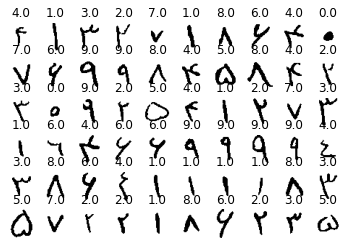

In [13]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    indx=np.random.randint(1,20000)
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(xtrain[indx], cmap='gray_r')
    plt.title(Y_train[indx])

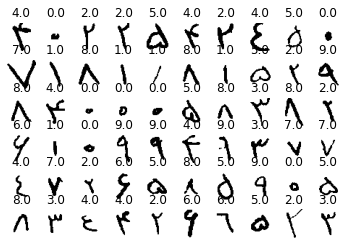

In [14]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    indx=np.random.randint(1,20000)
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(xtest[indx]*10, cmap='gray_r')
    plt.title(Y_test[indx])

In [15]:
import  torch
import  numpy               as      np
import  torch.nn            as      nn
from    torch.utils.data    import  TensorDataset, DataLoader
from    torchinfo           import  summary
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

try:
  from helper_functions import plot_loss_curves
except:
  print(f"[INFO] Couldn't find helper_functions.py, downloading...")
  with open("helper_functions.py", "wb") as f:
    import requests
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/helper_functions.py")
    f.write(request.content)
  from helper_functions import plot_loss_curves

In [16]:
# convert numpy arrays to pytorch tensors
xcxc , ycyc= torch.stack([torch.from_numpy(np.array(i)) for i in xtrain]).float() , torch.stack([torch.from_numpy(np.array(i,)) for i in Y_train]).long()
xvxv , yvyv= torch.stack([torch.from_numpy(np.array(i)) for i in xtest]).float() , torch.stack([torch.from_numpy(np.array(i)) for i in Y_test]).long()
xcxc=xcxc.unsqueeze(1)
xvxv=xvxv.unsqueeze(1)
train_dataset ,test_dataset = torch.utils.data.TensorDataset(xcxc, ycyc) , torch.utils.data.TensorDataset(xvxv, yvyv)
train_loader ,test_loader = (   torch.utils.data.DataLoader(train_dataset, batch_size=128,num_workers=3,shuffle=True) ,
                                torch.utils.data.DataLoader(test_dataset, batch_size=128,num_workers=3,shuffle=False)   )

## 2.2 Methodology design for proposed DCNN

In [17]:
from SadigAli import Hoda_SadigAli
# import engine
model= Hoda_SadigAli()

summary(model=model,
        input_size=(3, 1, 40, 40), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=30,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape                    Output Shape                   Param #                        Trainable
Hoda_SadigAli (Hoda_SadigAli)            [3, 1, 40, 40]                 [3, 10]                        --                             True
├─Sequential (block_1)                   [3, 1, 40, 40]                 [3, 64, 18, 18]                --                             True
│    └─Conv2d (0)                        [3, 1, 40, 40]                 [3, 64, 38, 38]                640                            True
│    └─ReLU (1)                          [3, 64, 38, 38]                [3, 64, 38, 38]                --                             --
│    └─BatchNorm2d (2)                   [3, 64, 38, 38]                [3, 64, 38, 38]                128                            True
│    └─MaxPool2d (3)                     [3, 64, 38, 38]                [3, 64, 18, 18]                --                             --
│    └─Dropout (4)        

>>> ``` scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_Adam, gamma=0.9) ```

# 3.Optimization algorithms

In [18]:
from torch.utils.tensorboard    import SummaryWriter
from engine_tensorboard         import train

loss_cross=torch.nn.CrossEntropyLoss()

## 3.1 Stochastic gradient-based optimization (SGD)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0994 | train_acc: 0.9668 | test_loss: 0.0333 | test_acc: 0.9897
Epoch: 2 | train_loss: 0.0200 | train_acc: 0.9935 | test_loss: 0.0251 | test_acc: 0.9927
Epoch: 3 | train_loss: 0.0134 | train_acc: 0.9956 | test_loss: 0.0192 | test_acc: 0.9944
Epoch: 4 | train_loss: 0.0099 | train_acc: 0.9969 | test_loss: 0.0174 | test_acc: 0.9947
Epoch: 5 | train_loss: 0.0073 | train_acc: 0.9976 | test_loss: 0.0179 | test_acc: 0.9945
Epoch: 6 | train_loss: 0.0058 | train_acc: 0.9983 | test_loss: 0.0168 | test_acc: 0.9954
Epoch: 7 | train_loss: 0.0043 | train_acc: 0.9986 | test_loss: 0.0197 | test_acc: 0.9948
Epoch: 8 | train_loss: 0.0038 | train_acc: 0.9989 | test_loss: 0.0154 | test_acc: 0.9957
Epoch: 9 | train_loss: 0.0030 | train_acc: 0.9992 | test_loss: 0.0151 | test_acc: 0.9958
Epoch: 10 | train_loss: 0.0028 | train_acc: 0.9991 | test_loss: 0.0164 | test_acc: 0.9957
[INFO] Total training time: 226.389 seconds


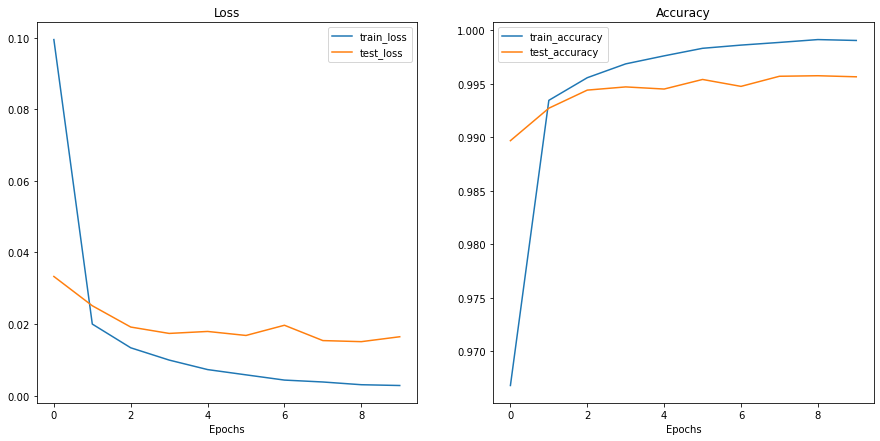

In [19]:
modelSGD=Hoda_SadigAli().to(device)
opt_SGD = torch.optim.SGD(modelSGD.parameters(), lr=0.01,momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_SGD, gamma=0.9)

start_time = timer()
result_SGD = train(model=modelSGD,train_dataloader= train_loader,test_dataloader=test_loader,optimizer=opt_SGD,
                    loss_fn=loss_cross,epochs=10,device=device)
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

plot_loss_curves(result_SGD)

## 3.2 Adaptive delta (Adadelta)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0958 | train_acc: 0.9709 | test_loss: 0.0348 | test_acc: 0.9893
Epoch: 2 | train_loss: 0.0175 | train_acc: 0.9947 | test_loss: 0.0356 | test_acc: 0.9895
Epoch: 3 | train_loss: 0.0128 | train_acc: 0.9959 | test_loss: 0.0194 | test_acc: 0.9944
Epoch: 4 | train_loss: 0.0096 | train_acc: 0.9971 | test_loss: 0.0224 | test_acc: 0.9933
Epoch: 5 | train_loss: 0.0075 | train_acc: 0.9977 | test_loss: 0.0221 | test_acc: 0.9938
Epoch: 6 | train_loss: 0.0059 | train_acc: 0.9982 | test_loss: 0.0229 | test_acc: 0.9938
Epoch: 7 | train_loss: 0.0042 | train_acc: 0.9987 | test_loss: 0.0218 | test_acc: 0.9941
Epoch: 8 | train_loss: 0.0036 | train_acc: 0.9989 | test_loss: 0.0198 | test_acc: 0.9948
Epoch: 9 | train_loss: 0.0027 | train_acc: 0.9993 | test_loss: 0.0158 | test_acc: 0.9960
Epoch: 10 | train_loss: 0.0034 | train_acc: 0.9989 | test_loss: 0.0204 | test_acc: 0.9949
[INFO] Total training time: 241.627 seconds


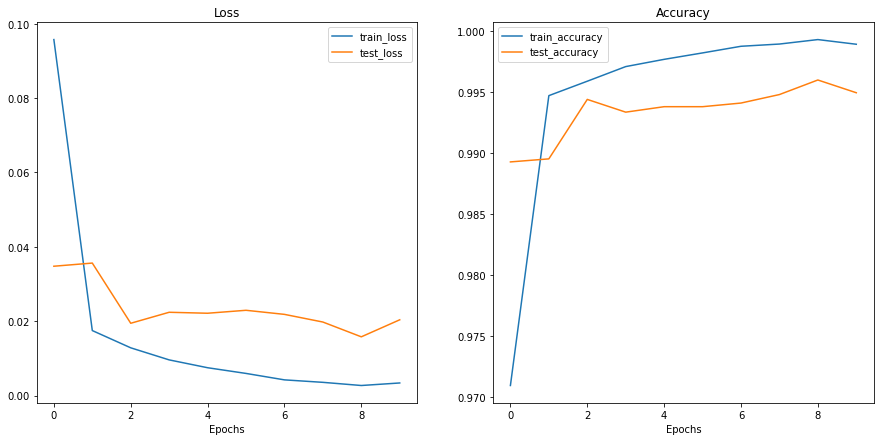

In [20]:
modeladaleta=Hoda_SadigAli().to(device)
opt_adaleta = torch.optim.Adadelta(modeladaleta.parameters(), lr=0.1, rho=0.9, eps=1e-06, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_adaleta, gamma=0.9)

start_time = timer()
result_adaleta = train(model=modeladaleta,train_dataloader= train_loader,test_dataloader=test_loader,optimizer=opt_adaleta,
                    loss_fn=loss_cross,epochs=10,device=device)
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

plot_loss_curves(result_adaleta)

## 3.3 Adaptive moment estimation (Adam)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2331 | train_acc: 0.9379 | test_loss: 5.5310 | test_acc: 0.2064
Epoch: 2 | train_loss: 0.0363 | train_acc: 0.9900 | test_loss: 8.0635 | test_acc: 0.1659
Epoch: 3 | train_loss: 0.0246 | train_acc: 0.9928 | test_loss: 20.1231 | test_acc: 0.0995
Epoch: 4 | train_loss: 0.0196 | train_acc: 0.9942 | test_loss: 1.6815 | test_acc: 0.6394
Epoch: 5 | train_loss: 0.0189 | train_acc: 0.9950 | test_loss: 6.6265 | test_acc: 0.3510
Epoch: 6 | train_loss: 0.0119 | train_acc: 0.9966 | test_loss: 8.5837 | test_acc: 0.4661
Epoch: 7 | train_loss: 0.0119 | train_acc: 0.9965 | test_loss: 3.0926 | test_acc: 0.4053
Epoch: 8 | train_loss: 0.0106 | train_acc: 0.9971 | test_loss: 4.6067 | test_acc: 0.3058
Epoch: 9 | train_loss: 0.0089 | train_acc: 0.9973 | test_loss: 3.6477 | test_acc: 0.4786
Epoch: 10 | train_loss: 0.0073 | train_acc: 0.9976 | test_loss: 7.1217 | test_acc: 0.3134
[INFO] Total training time: 233.393 seconds


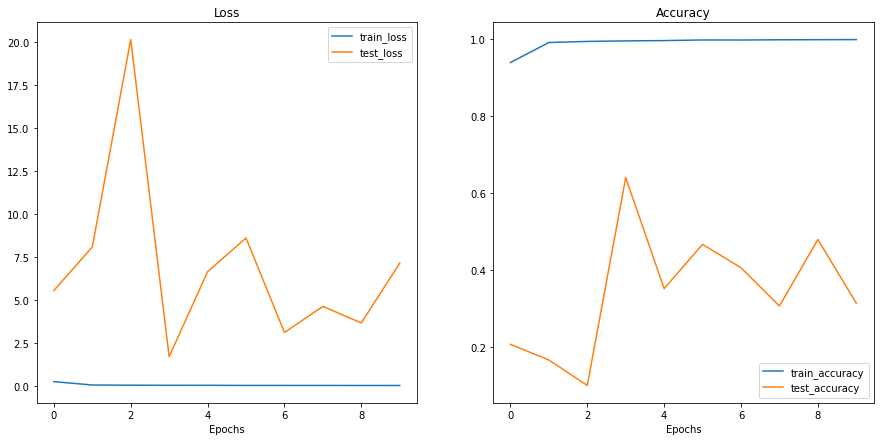

In [21]:
modelADAM=Hoda_SadigAli().to(device)
opt_Adam= torch.optim.Adam(modelADAM.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_Adam, gamma=0.9)
start_time = timer()
result_ADAM = train(model=modelADAM,train_dataloader= train_loader,test_dataloader=test_loader,optimizer=opt_Adam,loss_fn=loss_cross,epochs=10,device=device,)#scheduler=scheduler
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

plot_loss_curves(result_ADAM)

***
***
***
# 4.Optimization
***
***
***


In [22]:
from Utils import create_writer,save_model

# Create models list (need to create a new model for each experiment)
optimizerf = ["adadelta","adam","momentum"] 
# Create epoch list
num_epochs = [1, 10,20]


# Keep track of experiment numbers
experiment_number = 0
from engine_tensorboard import train_with_tensorboard

# Loop through the epochs
for epochs in num_epochs:
  # Loop through each model name and create a new model instance
  for optimizer in optimizerf:

    # Print out info
    experiment_number += 1
    print(f"[INFO] Experiment number: {experiment_number}")
    print(f"[INFO] Model: {optimizer}")
    # print(f"[INFO] DataLoader: {dataloader_name}")
    print(f"[INFO] Number of epochs: {epochs}")

    # Select and create the model
    if optimizer == "momentum":
      modelSGD=Hoda_SadigAli().to(device)
      opt_SGD = torch.optim.SGD(modelSGD.parameters(), lr=0.01,momentum=0.9)
      model=modelSGD
      optimizer=opt_SGD
      NAme="SGD"

    elif optimizer == "adadelta":
      modeladaleta=Hoda_SadigAli().to(device)
      opt_adaleta = torch.optim.Adadelta(modeladaleta.parameters(), lr=0.1, rho=0.9, eps=1e-06, weight_decay=0)
      model=modeladaleta
      optimizer=opt_adaleta
      NAme="adaleta"
    else :
      modelADAM=Hoda_SadigAli().to(device)
      opt_Adam= torch.optim.Adam(modelADAM.parameters(),lr=0.01)
      model=modelADAM
      optimizer=opt_Adam
      NAme="Adam"
    # Create a new loss and optimizer for every model
    loss_cross = nn.CrossEntropyLoss()
    # Train target model with target dataloader and track experiments 
    # Note: using train() rather than engine.train()
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

    train_with_tensorboard(model=model,
                          train_dataloader=train_loader,
                          test_dataloader=test_loader,
                          optimizer=optimizer,
                          loss_fn=loss_cross,
                          epochs=epochs,
                          device=device,
                          writer=create_writer( experiment_name=NAme,
                                                model_name="Hoda_SadigAli",
                                                extra=f"{epochs}_epochs"))
    
    # Save the model to file so we can import it later if need be
    save_model(model=model,
                target_dir="models",
                model_name=f"07_Hoda_SadigAli_"+NAme+f"_{epochs}_epochs.pth")
    print("-"*50 + "\n")

[INFO] Experiment number: 1
[INFO] Model: adadelta
[INFO] Number of epochs: 1
[INFO] Created SummaryWriter saving to runs/2022-12-19/adaleta/Hoda_SadigAli/1_epochs


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0928 | train_acc: 0.9722 | test_loss: 0.0310 | test_acc: 0.9896
[INFO] Saving model to: models/07_Hoda_SadigAli_adaleta_1_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 2
[INFO] Model: adam
[INFO] Number of epochs: 1
[INFO] Created SummaryWriter saving to runs/2022-12-19/Adam/Hoda_SadigAli/1_epochs


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2514 | train_acc: 0.9298 | test_loss: 130.6743 | test_acc: 0.0995
[INFO] Saving model to: models/07_Hoda_SadigAli_Adam_1_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 3
[INFO] Model: momentum
[INFO] Number of epochs: 1
[INFO] Created SummaryWriter saving to runs/2022-12-19/SGD/Hoda_SadigAli/1_epochs


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0929 | train_acc: 0.9699 | test_loss: 0.0394 | test_acc: 0.9880
[INFO] Saving model to: models/07_Hoda_SadigAli_SGD_1_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 4
[INFO] Model: adadelta
[INFO] Number of epochs: 10
[INFO] Created SummaryWriter saving to runs/2022-12-19/adaleta/Hoda_SadigAli/10_epochs


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0985 | train_acc: 0.9707 | test_loss: 0.0515 | test_acc: 0.9847
Epoch: 2 | train_loss: 0.0188 | train_acc: 0.9941 | test_loss: 0.0294 | test_acc: 0.9907
Epoch: 3 | train_loss: 0.0135 | train_acc: 0.9959 | test_loss: 0.0247 | test_acc: 0.9923
Epoch: 4 | train_loss: 0.0096 | train_acc: 0.9968 | test_loss: 0.0189 | test_acc: 0.9948
Epoch: 5 | train_loss: 0.0082 | train_acc: 0.9975 | test_loss: 0.0177 | test_acc: 0.9951
Epoch: 6 | train_loss: 0.0059 | train_acc: 0.9982 | test_loss: 0.0175 | test_acc: 0.9949
Epoch: 7 | train_loss: 0.0051 | train_acc: 0.9984 | test_loss: 0.0154 | test_acc: 0.9957
Epoch: 8 | train_loss: 0.0046 | train_acc: 0.9985 | test_loss: 0.0247 | test_acc: 0.9942
Epoch: 9 | train_loss: 0.0039 | train_acc: 0.9988 | test_loss: 0.0168 | test_acc: 0.9951
Epoch: 10 | train_loss: 0.0031 | train_acc: 0.9991 | test_loss: 0.0210 | test_acc: 0.9947
[INFO] Saving model to: models/07_Hoda_SadigAli_adaleta_10_epochs.pth
---------------------------------------

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2243 | train_acc: 0.9381 | test_loss: 12.2724 | test_acc: 0.1355
Epoch: 2 | train_loss: 0.0379 | train_acc: 0.9897 | test_loss: 15.7738 | test_acc: 0.1004
Epoch: 3 | train_loss: 0.0262 | train_acc: 0.9927 | test_loss: 16.0970 | test_acc: 0.0995
Epoch: 4 | train_loss: 0.0236 | train_acc: 0.9933 | test_loss: 16.8264 | test_acc: 0.0995
Epoch: 5 | train_loss: 0.0202 | train_acc: 0.9946 | test_loss: 977.4953 | test_acc: 0.0995
Epoch: 6 | train_loss: 0.0182 | train_acc: 0.9950 | test_loss: 4.4627 | test_acc: 0.3981
Epoch: 7 | train_loss: 0.0173 | train_acc: 0.9952 | test_loss: 9.7984 | test_acc: 0.2056
Epoch: 8 | train_loss: 0.0137 | train_acc: 0.9961 | test_loss: 192.7455 | test_acc: 0.0857
Epoch: 9 | train_loss: 0.0153 | train_acc: 0.9958 | test_loss: 11.5576 | test_acc: 0.1485
Epoch: 10 | train_loss: 0.0146 | train_acc: 0.9961 | test_loss: 21.3797 | test_acc: 0.3374
[INFO] Saving model to: models/07_Hoda_SadigAli_Adam_10_epochs.pth
--------------------------------

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0982 | train_acc: 0.9684 | test_loss: 0.0524 | test_acc: 0.9833
Epoch: 2 | train_loss: 0.0188 | train_acc: 0.9940 | test_loss: 0.0281 | test_acc: 0.9919
Epoch: 3 | train_loss: 0.0143 | train_acc: 0.9954 | test_loss: 0.0223 | test_acc: 0.9931
Epoch: 4 | train_loss: 0.0108 | train_acc: 0.9968 | test_loss: 0.0262 | test_acc: 0.9926
Epoch: 5 | train_loss: 0.0085 | train_acc: 0.9973 | test_loss: 0.0227 | test_acc: 0.9940
Epoch: 6 | train_loss: 0.0082 | train_acc: 0.9973 | test_loss: 0.0159 | test_acc: 0.9958
Epoch: 7 | train_loss: 0.0050 | train_acc: 0.9986 | test_loss: 0.0211 | test_acc: 0.9942
Epoch: 8 | train_loss: 0.0050 | train_acc: 0.9984 | test_loss: 0.0293 | test_acc: 0.9925
Epoch: 9 | train_loss: 0.0039 | train_acc: 0.9987 | test_loss: 0.0233 | test_acc: 0.9943
Epoch: 10 | train_loss: 0.0047 | train_acc: 0.9984 | test_loss: 0.0183 | test_acc: 0.9953
[INFO] Saving model to: models/07_Hoda_SadigAli_SGD_10_epochs.pth
-------------------------------------------

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0922 | train_acc: 0.9726 | test_loss: 0.0527 | test_acc: 0.9837
Epoch: 2 | train_loss: 0.0196 | train_acc: 0.9940 | test_loss: 0.0361 | test_acc: 0.9894
Epoch: 3 | train_loss: 0.0137 | train_acc: 0.9957 | test_loss: 0.0227 | test_acc: 0.9929
Epoch: 4 | train_loss: 0.0098 | train_acc: 0.9968 | test_loss: 0.0216 | test_acc: 0.9940
Epoch: 5 | train_loss: 0.0080 | train_acc: 0.9973 | test_loss: 0.0191 | test_acc: 0.9948
Epoch: 6 | train_loss: 0.0065 | train_acc: 0.9980 | test_loss: 0.0212 | test_acc: 0.9941
Epoch: 7 | train_loss: 0.0053 | train_acc: 0.9983 | test_loss: 0.0242 | test_acc: 0.9939
Epoch: 8 | train_loss: 0.0051 | train_acc: 0.9986 | test_loss: 0.0271 | test_acc: 0.9930
Epoch: 9 | train_loss: 0.0039 | train_acc: 0.9988 | test_loss: 0.0173 | test_acc: 0.9953
Epoch: 10 | train_loss: 0.0029 | train_acc: 0.9991 | test_loss: 0.0189 | test_acc: 0.9951
Epoch: 11 | train_loss: 0.0029 | train_acc: 0.9992 | test_loss: 0.0202 | test_acc: 0.9948
Epoch: 12 | train_l

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2391 | train_acc: 0.9295 | test_loss: 1.3575 | test_acc: 0.7161
Epoch: 2 | train_loss: 0.0433 | train_acc: 0.9879 | test_loss: 62.3253 | test_acc: 0.1283
Epoch: 3 | train_loss: 0.0275 | train_acc: 0.9923 | test_loss: 11.2162 | test_acc: 0.3191
Epoch: 4 | train_loss: 0.0234 | train_acc: 0.9933 | test_loss: 1090.0852 | test_acc: 0.0996
Epoch: 5 | train_loss: 0.0204 | train_acc: 0.9945 | test_loss: 19.8422 | test_acc: 0.1774
Epoch: 6 | train_loss: 0.0166 | train_acc: 0.9952 | test_loss: 13.4661 | test_acc: 0.1456
Epoch: 7 | train_loss: 0.0180 | train_acc: 0.9949 | test_loss: 34.1103 | test_acc: 0.0995
Epoch: 8 | train_loss: 0.0168 | train_acc: 0.9954 | test_loss: 186.6060 | test_acc: 0.0995
Epoch: 9 | train_loss: 0.0146 | train_acc: 0.9959 | test_loss: 8.5210 | test_acc: 0.1035
Epoch: 10 | train_loss: 0.0147 | train_acc: 0.9964 | test_loss: 9.5346 | test_acc: 0.2383
Epoch: 11 | train_loss: 0.0143 | train_acc: 0.9964 | test_loss: 13.2994 | test_acc: 0.1981
Epoch: 1

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0970 | train_acc: 0.9682 | test_loss: 0.0381 | test_acc: 0.9883
Epoch: 2 | train_loss: 0.0203 | train_acc: 0.9933 | test_loss: 0.0212 | test_acc: 0.9934
Epoch: 3 | train_loss: 0.0135 | train_acc: 0.9958 | test_loss: 0.0235 | test_acc: 0.9927
Epoch: 4 | train_loss: 0.0110 | train_acc: 0.9966 | test_loss: 0.0201 | test_acc: 0.9939
Epoch: 5 | train_loss: 0.0087 | train_acc: 0.9974 | test_loss: 0.0233 | test_acc: 0.9939
Epoch: 6 | train_loss: 0.0068 | train_acc: 0.9979 | test_loss: 0.0197 | test_acc: 0.9948
Epoch: 7 | train_loss: 0.0053 | train_acc: 0.9983 | test_loss: 0.0207 | test_acc: 0.9950
Epoch: 8 | train_loss: 0.0046 | train_acc: 0.9985 | test_loss: 0.0208 | test_acc: 0.9947
Epoch: 9 | train_loss: 0.0049 | train_acc: 0.9983 | test_loss: 0.0211 | test_acc: 0.9947
Epoch: 10 | train_loss: 0.0033 | train_acc: 0.9989 | test_loss: 0.0222 | test_acc: 0.9946
Epoch: 11 | train_loss: 0.0042 | train_acc: 0.9986 | test_loss: 0.0241 | test_acc: 0.9943
Epoch: 12 | train_l